In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [2]:
# 插值
data=np.loadtxt('./transfer-function.txt',skiprows=1)
data_lgk=np.log10(data[:,0])
data_lgTk=np.log10(data[:,1])
lgTk_interp=interp1d(data_lgk,data_lgTk,kind='cubic')
def Tk(k):
    return 10 ** lgTk_interp(np.log10(k))[()]

k=1e-3
a=Tk(k)
print('k=',k,'Tk=',a)

k= 0.001 Tk= 0.984495401382446


In [3]:
A_s=1
h=0.6774
R=8*h**(-1)
n_s=0.96

In [4]:
#窗函数
def W(k,R):
    return (3*(np.sin(k*R)-(k*R)*np.cos(k*R)))/(k*R)**3

In [5]:
def P_CDM(k):
    return A_s*k**n_s*Tk(k)**2

In [6]:
#积分
def sigma_noint(k):
    return (np.pi * k**2)/((2*np.pi)**3)*P_CDM(k)*W(k,R)**2

In [9]:
sigma2,err=quad(sigma_noint,1e-5,1e5,epsrel=1e-3)
print(sigma2)

3.3003263920574547e-18


In [11]:
A_s=(0.82)**2/sigma2
print(A_s)

2.0373742476446986e+17


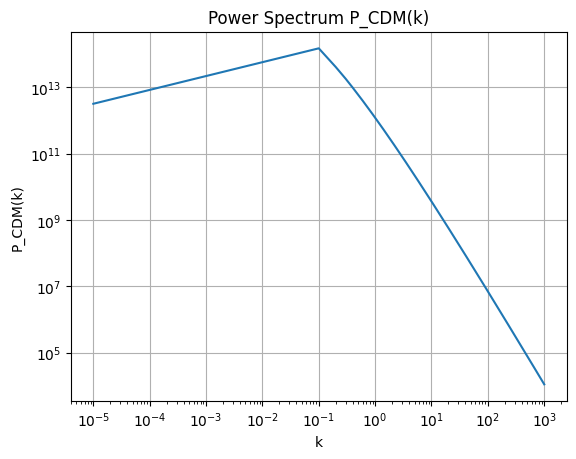

In [12]:
import matplotlib.pyplot as plt
k_min = 1e-5  # 最小 k 值
k_max = 1e3  # 最大 k 值
num_points = 10000  # 点的数量

k_values = np.linspace(k_min, k_max, num_points)
P_values = P_CDM(k_values)

plt.plot(k_values, P_values)
plt.xscale('log')  # 应用对数刻度于 x 轴
plt.yscale('log')  # 应用对数刻度于 y 轴
plt.xlabel('k')
plt.ylabel('P_CDM(k)')
plt.title('Power Spectrum P_CDM(k)')
plt.grid(True)

plt.show()


In [14]:
#温暗物质
def P_WDM(k):
    return P_CDM(k)*T_WDM(k)**2

def T_WDM(k):
    return (1+((alpha*k)**(2*mu)))**(-5/mu)

mu=1.12
Omega_WDM=Omega_m=0.32
m_WDM=[10,1,0.1]
alpha=0.049*(m_WDM[1])**(-1.11)*(Omega_WDM/0.25)**0.15*(h/0.7)**1.22*h**(-1)


In [15]:
#积分
def sigma_noint2(k):
    return (np.pi * k**2)/((2*np.pi)**3)*P_WDM(k)*W(k,R)**2

In [16]:
A_s=1
h=0.6774
R=8*h**(-1)
n_s=0.96


In [17]:
def plot():
    k_min = 1e-5  # 最小 k 值
    k_max = 1e3  # 最大 k 值
    num_points = 10000  # 点的数量

    k_values = np.linspace(k_min, k_max, num_points)
    P_values = P_WDM(k_values)

    plt.plot(k_values, P_values)
    plt.xscale('log')  # 应用对数刻度于 x 轴
    plt.yscale('log')  # 应用对数刻度于 y 轴
    plt.xlabel('k')
    plt.ylabel('P_WDM(k)')
    plt.title('Power Spectrum P_WDM(k)')
    plt.grid(True)

    plt.show()

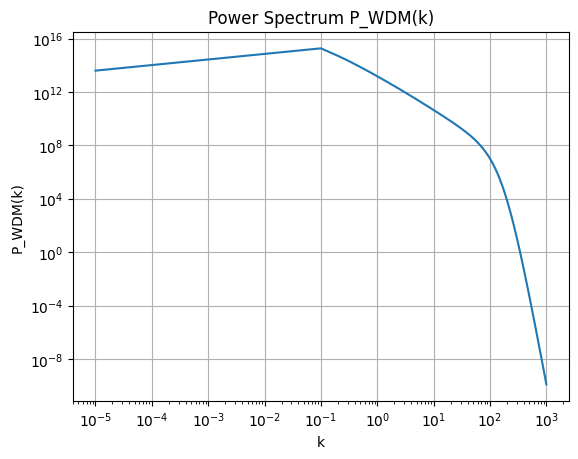

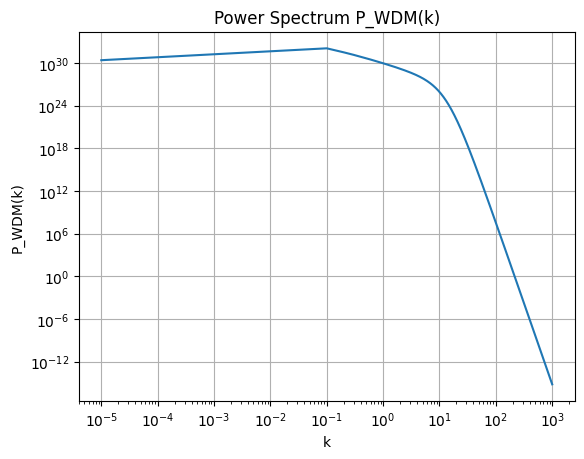

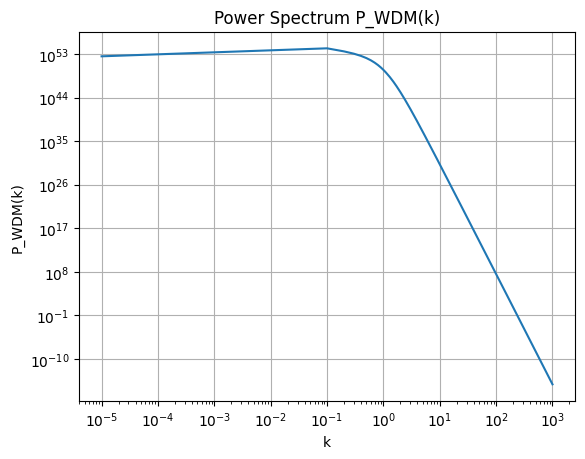

In [24]:
for i in m_WDM:
    A_s=1
    alpha=0.049*(i)**(-1.11)*(Omega_WDM/0.25)**0.15*(h/0.7)**1.22*h**(-1)
    sigma2,err=quad(sigma_noint2,1e-5,1e5,epsrel=1e-3)
    A_s=(0.82)**2/sigma2

    plot()